# Task - 9 Handwritten equation solver using CNN 

**Author: Rahul Rathour, Data Science Intern at LetsGrowMore**

*Mathematical equation solver using character and symbol recognition using image processing and CNN.*

Link for the dataset :
 https://www.kaggle.com/datasets/xainano/handwrittenmathsymbols

References : 
https://www.geeksforgeeks.org/handwritten-equation-solver-in-python/



## importing necessary libraries

In [78]:
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
import os
from os import listdir
from os.path import isfile, join
import pandas as pd

import pickle

## Data Preprocessing

In [79]:
def load_images_from_folder(folder):
    train_data=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        img=~img
        if img is not None:
            ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)

            ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
            cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
            w=int(28)
            h=int(28)
            maxi=0
            for c in cnt:
                x,y,w,h=cv2.boundingRect(c)
                maxi=max(w*h,maxi)
                if maxi==w*h:
                    x_max=x
                    y_max=y
                    w_max=w
                    h_max=h
            im_crop= thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
            im_resize = cv2.resize(im_crop,(28,28))
            im_resize=np.reshape(im_resize,(784,1))
            train_data.append(im_resize)
    return train_data

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [22]:
!kaggle datasets download -d xainano/handwrittenmathsymbols

 96% 329M/343M [00:02<00:00, 138MB/s]
100% 343M/343M [00:02<00:00, 136MB/s]


In [23]:
!unzip handwrittenmathsymbols.zip

Streaming output truncated to the last 5000 lines.
  inflating: extracted_images/0/0_24106.jpg  
  inflating: extracted_images/0/0_2414.jpg  
  inflating: extracted_images/0/0_24177.jpg  
  inflating: extracted_images/0/0_2420.jpg  
  inflating: extracted_images/0/0_24398.jpg  
  inflating: extracted_images/0/0_24469.jpg  
  inflating: extracted_images/0/0_2462.jpg  
  inflating: extracted_images/0/0_24690.jpg  
  inflating: extracted_images/0/0_24761.jpg  
  inflating: extracted_images/0/0_2490.jpg  
  inflating: extracted_images/0/0_24982.jpg  
  inflating: extracted_images/0/0_2501.jpg  
  inflating: extracted_images/0/0_25053.jpg  
  inflating: extracted_images/0/0_25274.jpg  
  inflating: extracted_images/0/0_25345.jpg  
  inflating: extracted_images/0/0_2552.jpg  
  inflating: extracted_images/0/0_25566.jpg  
  inflating: extracted_images/0/0_25637.jpg  
  inflating: extracted_images/0/0_25858.jpg  
  inflating: extracted_images/0/0_25929.jpg  
  inflating: extracted_images/0/0_2

In [80]:
data=[]
data=load_images_from_folder('/content/extracted_images/-')
len(data)
for i in range(0,len(data)):
    data[i]=np.append(data[i],['10'])
    
print(len(data))

33997


In [24]:
!kaggle datasets download -d clarencezhao/handwritten-math-symbol-dataset

 61% 35.0M/57.8M [00:00<00:00, 82.0MB/s]
100% 57.8M/57.8M [00:00<00:00, 106MB/s] 


In [25]:
!unzip handwritten-math-symbol-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/four/59106.jpg    
  inflating: train/four/5912.jpg     
  inflating: train/four/59135.jpg    
  inflating: train/four/59719.jpg    
  inflating: train/four/59777.jpg    
  inflating: train/four/59800.jpg    
  inflating: train/four/59827.jpg    
  inflating: train/four/59841.jpg    
  inflating: train/four/59915.jpg    
  inflating: train/four/59978.jpg    
  inflating: train/four/60008.jpg    
  inflating: train/four/60022.jpg    
  inflating: train/four/60487.jpg    
  inflating: train/four/60585.jpg    
  inflating: train/four/60817.jpg    
  inflating: train/four/61039.jpg    
  inflating: train/four/61356.jpg    
  inflating: train/four/61694.jpg    
  inflating: train/four/61771.jpg    
  inflating: train/four/61782.jpg    
  inflating: train/four/61927.jpg    
  inflating: train/four/6217.jpg     
  inflating: train/four/62194.jpg    
  inflating: train/four/62564.jpg    
  inflating: train/four/62697.jpg    

In [81]:
data11=load_images_from_folder('/content/extracted_images/+')

for i in range(0,len(data11)):
    data11[i]=np.append(data11[i],['11'])
data=np.concatenate((data,data11))
print(len(data))

59109


In [82]:
data0=load_images_from_folder('/content/extracted_images/0')

for i in range(0,len(data0)):
    data0[i]=np.append(data0[i],['0'])
data=np.concatenate((data,data0))
print(len(data))

64574


In [83]:
data1=load_images_from_folder('/content/eval/one')
for i in range(0,len(data1)):
    data1[i]=np.append(data1[i],['1'])
data=np.concatenate((data,data1))
print(len(data)) 

64629


In [84]:
data2=load_images_from_folder('/content/eval/two')
for i in range(0,len(data2)):
    data2[i]=np.append(data2[i],['2'])
data=np.concatenate((data,data2))
print(len(data))

64683


In [85]:
data3=load_images_from_folder('/content/eval/three')
for i in range(0,len(data3)):
    data3[i]=np.append(data3[i],['3'])
data=np.concatenate((data,data3))
print(len(data))
     

64737


In [86]:
data4=load_images_from_folder('/content/eval/four')
for i in range(0,len(data4)):
    data4[i]=np.append(data4[i],['4'])
data=np.concatenate((data,data4))
print(len(data))

64791


In [87]:

data5=load_images_from_folder('/content/eval/five')
for i in range(0,len(data5)):
    data5[i]=np.append(data5[i],['5'])
data=np.concatenate((data,data5))
print(len(data))
     

64845


In [88]:
data6=load_images_from_folder('/content/eval/six')
for i in range(0,len(data6)):
    data6[i]=np.append(data6[i],['6'])
data=np.concatenate((data,data6))
print(len(data))

64898


In [89]:
data7=load_images_from_folder('/content/eval/seven')
for i in range(0,len(data7)):
    data7[i]=np.append(data7[i],['7'])
data=np.concatenate((data,data7))
print(len(data))


64952


In [90]:

data8 = load_images_from_folder('/content/eval/eight')
for i in range(0,len(data8)):
    data8[i]=np.append(data8[i],['8'])
data=np.concatenate((data,data8))
print(len(data))

65006


In [91]:
data9 = load_images_from_folder('/content/eval/nine')
for i in range(0,len(data9)):
    data9[i]=np.append(data9[i],['9'])
data=np.concatenate((data,data9))
print(len(data))

65060


In [92]:
data12 = load_images_from_folder('/content/eval/timesval')
for i in range(0,len(data12)):
    data12[i]=np.append(data12[i],['12'])
data=np.concatenate((data,data12))
print(len(data))

65140


In [94]:
df=pd.DataFrame(data,index=None)
df.to_csv('train_handwritten.csv',index=False)

In [95]:
data = pd.read_csv('/content/train_handwritten.csv',index_col=False)
labels = data[['784']]

In [96]:
data.drop(data.columns[[784]],axis=1,inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,255,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.image_data_format()

'channels_last'

In [98]:

labels=np.array(labels)

In [99]:

from keras.utils.np_utils import to_categorical
cat=to_categorical(labels,num_classes=14)

In [100]:
print(cat[1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [101]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,255,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
data.shape

(65140, 784)

In [103]:
temp=data.to_numpy()

In [104]:
X_train = temp.reshape(temp.shape[0], 28, 28, 1)

In [105]:
temp.shape[0]

65140

In [106]:
X_train.shape

(65140, 28, 28, 1)

In [107]:

l=[]
for i in range(14326):
    l.append(np.array(data[i:i+1]).reshape(1,28,28))
     

In [108]:
np.random.seed(7)

In [109]:
len(l[0])

1

In [110]:
X_train.shape

(65140, 28, 28, 1)

## Building the model

In [111]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(14, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [112]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 15)        4335      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 15)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 6, 6, 15)          0         
                                                                 
 flatten_2 (Flatten)         (None, 540)              

## plotting the model

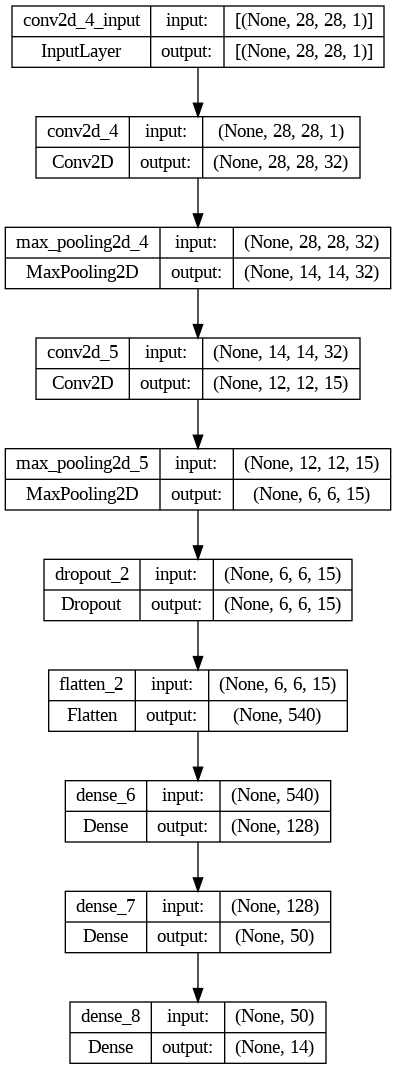

In [113]:

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [114]:
model.fit(X_train, cat, epochs=25, batch_size=200,shuffle=True,verbose=1)

Epoch 1/25
326/326 [==============================] - 4s 6ms/step - loss: 0.2488 - accuracy: 0.9748
Epoch 2/25
326/326 [==============================] - 2s 6ms/step - loss: 0.0257 - accuracy: 0.9937
Epoch 3/25
326/326 [==============================] - 2s 6ms/step - loss: 0.0152 - accuracy: 0.9959
Epoch 4/25
326/326 [==============================] - 2s 7ms/step - loss: 0.0108 - accuracy: 0.9970
Epoch 5/25
326/326 [==============================] - 2s 6ms/step - loss: 0.0084 - accuracy: 0.9978
Epoch 6/25
326/326 [==============================] - 2s 6ms/step - loss: 0.0047 - accuracy: 0.9988
Epoch 7/25
326/326 [==============================] - 2s 6ms/step - loss: 0.0056 - accuracy: 0.9984
Epoch 8/25
326/326 [==============================] - 2s 6ms/step - loss: 0.0042 - accuracy: 0.9988
Epoch 9/25
326/326 [==============================] - 2s 6ms/step - loss: 0.0050 - accuracy: 0.9984
Epoch 10/25
326/326 [==============================] - 2s 7ms/step - loss: 0.0049 - accuracy: 0.9986

## Saving the model

In [115]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))
model.save_weights("model_final.h5")

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dropout
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config

## Testing the model

In [116]:
import cv2
import numpy as np
img = cv2.imread('Test 7.jpg',cv2.IMREAD_GRAYSCALE)

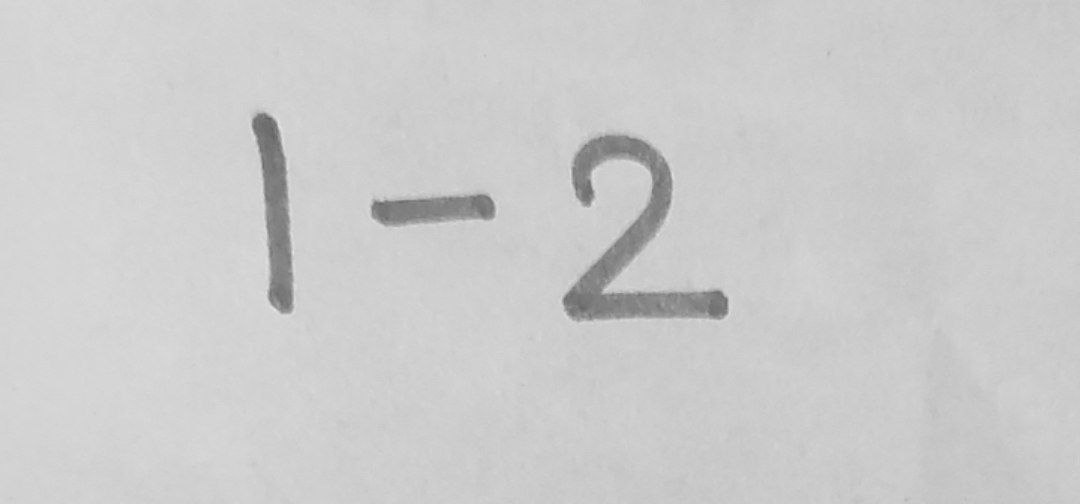

In [117]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [118]:
if img is not None:
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    print(rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    print(bool_rect)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        im_resize = cv2.resize(im_crop,(28,28))
        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

184
[[253, 114, 33, 94], [260, 137, 3, 3], [268, 223, 1, 1], [270, 282, 21, 27], [270, 248, 2, 1], [271, 300, 2, 1], [271, 251, 2, 4], [271, 232, 1, 1], [271, 178, 8, 8], [273, 211, 4, 12], [273, 157, 10, 9], [274, 231, 2, 1], [274, 224, 2, 1], [274, 129, 3, 6], [275, 235, 1, 2], [275, 224, 11, 29], [275, 150, 3, 3], [276, 166, 3, 3], [277, 272, 2, 2], [277, 267, 1, 3], [279, 232, 6, 6], [279, 184, 3, 3], [279, 182, 3, 3], [280, 279, 1, 1], [280, 274, 3, 2], [280, 216, 1, 2], [280, 208, 5, 2], [280, 190, 3, 3], [280, 187, 3, 3], [281, 252, 1, 1], [281, 219, 3, 4], [283, 302, 3, 3], [283, 271, 1, 1], [284, 248, 6, 10], [284, 225, 2, 3], [285, 215, 1, 1], [288, 273, 1, 2], [288, 261, 2, 3], [373, 200, 58, 21], [387, 202, 3, 3], [391, 204, 12, 10], [392, 216, 3, 4], [397, 219, 2, 1], [397, 203, 3, 3], [401, 218, 2, 1], [406, 218, 2, 2], [406, 205, 3, 4], [407, 207, 7, 7], [407, 204, 7, 3], [409, 216, 6, 2], [416, 217, 2, 1], [419, 215, 7, 3], [421, 215, 1, 1], [422, 204, 6, 1], [426, 209,

In [119]:
equation=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=np.argmax(model.predict(train_data[i]), axis=-1)
    if(result[0]==10):
        equation = equation +'-'
    if(result[0]==11):
        equation = equation +'+'
    if(result[0]==12):
        equation = equation +'*'
    if(result[0]==0):
        equation = equation +'0'
    if(result[0]==1):
        equation = equation +'1'
    if(result[0]==2):
        equation = equation +'2'
    if(result[0]==3):
        equation = equation +'3'
    if(result[0]==4):
        equation = equation +'4'
    if(result[0]==5):
        equation = equation +'5'
    if(result[0]==6):
        equation = equation +'6'
    if(result[0]==7):
        equation = equation +'7'
    if(result[0]==8):
        equation = equation +'8'
    if(result[0]==9):
        equation = equation +'9'
    
print(equation)
     

1/1 [==============================] - 0s 22ms/step
901+-+4++-5-5++-1


In [120]:
eval(equation)

886

In [123]:
equation='67+78*34/7'
eval(equation)

445.85714285714283